In [1]:
#This code will help us to know the most profitable products of a company and the most effective employees, making use of the Northwind.db database
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conecction=sqlite3.connect("Northwind.db")

In [2]:
#Most profitable products:
Querry_1=('''
        SELECT ProductName, SUM(Price*Quantity) as Profits
        FROM OrderDetails as od
        JOIN Products as p ON p.ProductID=od.ProductID
        GROUP BY od.ProductID
        ORDER BY Profits DESC
        LIMIT 10
''')

               ProductName   Profits
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00
5             Alice Mutton  12909.00
6   Gnocchi di nonna Alice  10222.00
7   Mozzarella di Giovanni   9396.00
8             Vegie-spread   9175.10
9    Manjimup Dried Apples   8639.00


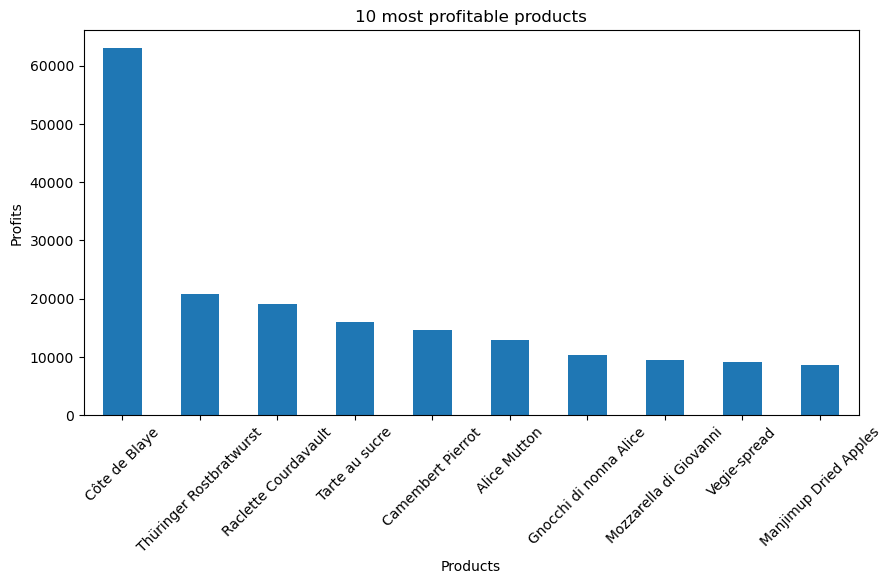

In [3]:
top_Products=pd.read_sql_query(Querry_1,conecction)
print(top_Products)
top_Products.plot(x="ProductName",y="Profits",kind="bar",figsize=(10,5),legend=False)
plt.title("10 most profitable products")
plt.xlabel("Products")
plt.ylabel("Profits")
plt.xticks(rotation=45)
plt.show()

In [4]:
#More efficent Employees:
Querry_2=('''       
        SELECT FirstName || " " || LastName as Employee, Count(*) as Total
        FROM Orders as o
        JOIN Employees as e
        ON e.EmployeeID=o.EmployeeID
        GROUP BY o.EmployeeID
        ORDER BY Total DESC
''')

           Employee  Total
0  Margaret Peacock     40
1   Janet Leverling     31
2     Nancy Davolio     29
3    Laura Callahan     27
4     Andrew Fuller     20
5    Michael Suyama     18
6       Robert King     14
7   Steven Buchanan     11
8    Anne Dodsworth      6


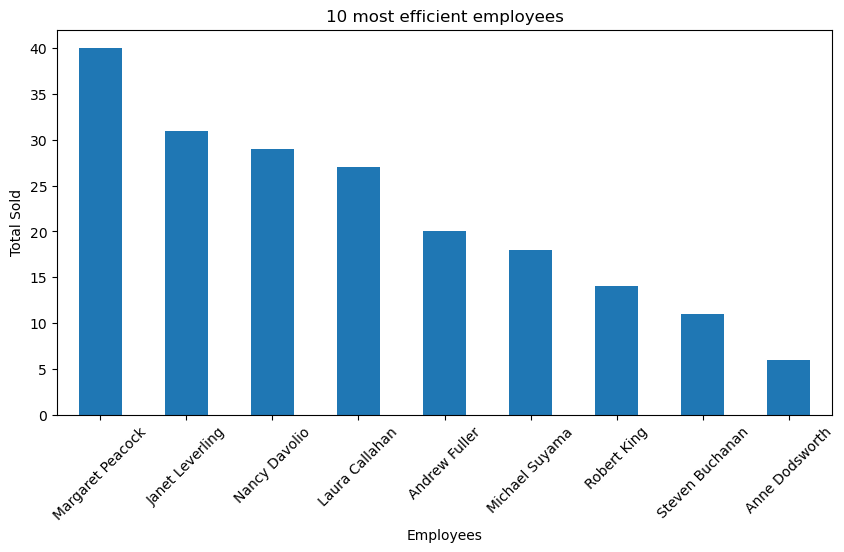

In [5]:
top_Employees=pd.read_sql_query(Querry_2,conecction)
print(top_Employees)
top_Employees.plot(x="Employee",y="Total",kind="bar",figsize=(10,5),legend=False)
plt.title("10 most efficient employees")
plt.xlabel("Employees")
plt.ylabel("Total Sold")
plt.xticks(rotation=45)
plt.show()